In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [2]:
import pathlib
dataset_url = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp"
data_dir = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp"
data_dir = pathlib.Path(data_dir)

In [3]:
print(data_dir)

C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp


C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\trainpp\4p\aug_0_1.jpg


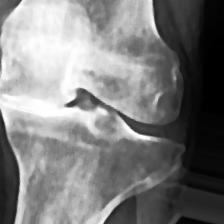

In [9]:
roses = list(data_dir.glob('4p/*'))
print(roses[0])
PIL.Image.open(str(roses[1999]))

In [10]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 5 classes.
Using 8000 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 5 classes.
Using 2000 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['0p', '1p', '2p', '3p', '4p']


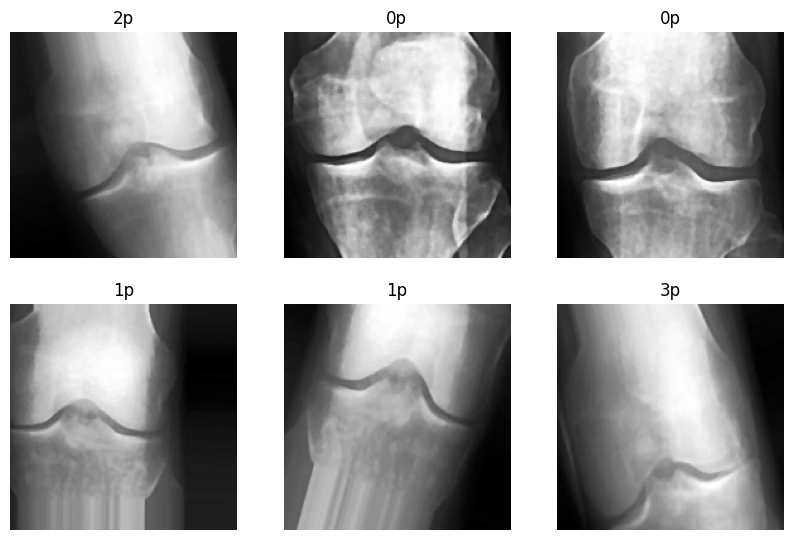

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50

# Initialize the Sequential model
resnet_model = Sequential()

# Load ResNet50 without the top layer (since you'll add your own)
pretrained_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
pretrained_model.trainable = False  # Freeze the ResNet layers

# Add the ResNet model
resnet_model.add(pretrained_model)

# Add a Flatten layer
resnet_model.add(Flatten())

# Add fully connected layers
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))  # Assuming 5 classes


In [15]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [16]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
import tensorflow as tf

# Assuming train_ds and val_ds are tf.data.Dataset objects
num_classes = 5

# Map function to one-hot encode labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)


In [18]:
from tensorflow.keras.optimizers import Adam

resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use learning_rate instead of lr
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [19]:
epochs=40
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.8219 - loss: 0.6356 - val_accuracy: 0.9430 - val_loss: 0.1530
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.9499 - loss: 0.1285 - val_accuracy: 0.9560 - val_loss: 0.1219
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.9573 - loss: 0.1129 - val_accuracy: 0.9565 - val_loss: 0.1128
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.9614 - loss: 0.0990 - val_accuracy: 0.9445 - val_loss: 0.1418
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.9618 - loss: 0.1004 - val_accuracy: 0.9570 - val_loss: 0.1061
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9619 - loss: 0.0926 - val_accuracy: 0.9570 - val_loss: 0.1079
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.9669 - loss: 0.0855 - val_accuracy: 0.9595 - val_loss: 0.1103
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.9649 - loss: 0.0883 - val_accu

# Evaluating The Model

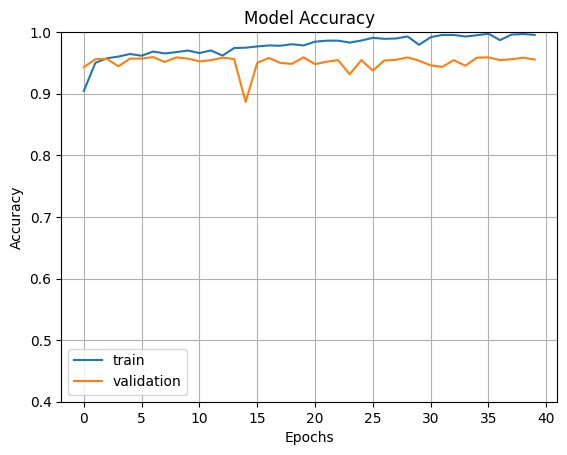

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

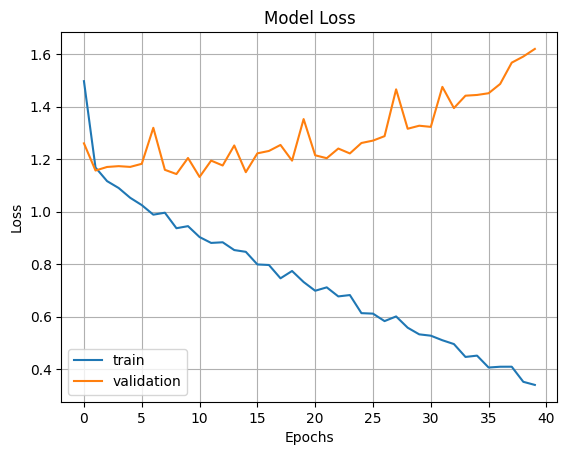

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [111]:
# Assuming you have a directory with more images for testing
test_dir = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritis\test"

# Load the new test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Ensure shuffle is False for consistent evaluation
)


Found 1656 files belonging to 5 classes.


In [35]:
# Assuming you have a directory with more images for testing
test_dir = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritispp\valpp"

# Load the new test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Ensure shuffle is False for consistent evaluation
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Keep shuffle=False to maintain order for predictions
)
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(labels.numpy())  # Directly extract the label indices

# Check the number of true labels
print(f"Number of true labels: {len(test_true_labels)}")
# Make predictions on the test dataset
test_pred = resnet_model.predict(test_ds)

# Convert predictions to class labels
test_pred_labels = np.argmax(test_pred, axis=1)

# Check if the lengths match
print(f"Number of predicted labels: {len(test_pred_labels)}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)
print(f'Confusion Matrix:\n{cm}')


Found 4017 files belonging to 5 classes.
Found 4017 files belonging to 5 classes.
Number of true labels: 4017
126/126 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step
Number of predicted labels: 4017
Accuracy: 0.8382
Precision: 0.9087
Recall: 0.8382
F1-score: 0.7822
Confusion Matrix:
[[  9 642   4   3   0]
 [  0 816   0   0   0]
 [  0   0 760   0   0]
 [  0   0   0 860   0]
 [  0   1   0   0 922]]


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code here


Found 4017 files belonging to 5 classes.
Number of true labels: 4017
126/126 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step
Number of predicted labels: 4017
Accuracy: 0.8382
Precision: 0.9087
Recall: 0.8382
F1-score: 0.7822
Confusion Matrix:
[[  9 642   4   3   0]
 [  0 816   0   0   0]
 [  0   0 760   0   0]
 [  0   0   0 860   0]
 [  0   1   0   0 922]]


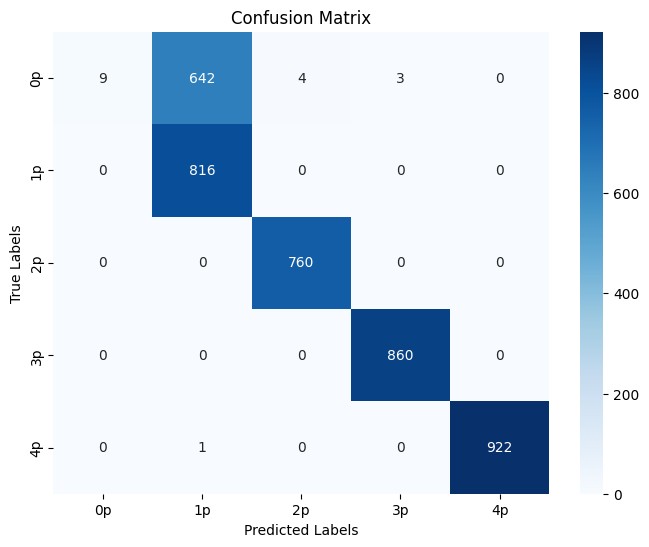

In [36]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Keep shuffle=False to maintain order for predictions
)
test_true_labels = []
for images, labels in test_ds:
    test_true_labels.extend(labels.numpy())  # Directly extract the label indices

# Check the number of true labels
print(f"Number of true labels: {len(test_true_labels)}")
# Make predictions on the test dataset
test_pred = resnet_model.predict(test_ds)

# Convert predictions to class labels
test_pred_labels = np.argmax(test_pred, axis=1)

# Check if the lengths match
print(f"Number of predicted labels: {len(test_pred_labels)}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)
print(f'Confusion Matrix:\n{cm}')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_ds.class_names, yticklabels=test_ds.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Making Predictions

In [23]:
import cv2
image=cv2.imread(str(roses[1]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [24]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.6259925e-15 1.2226999e-15 1.1803621e-11 2.4993586e-16 1.0000000e+00]]


In [25]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 4p
